In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import xgboost as xgb

# Reading in the Dataset

In [90]:
data = pd.read_csv("housing_price_prediction.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Data Exploration and Cleaning

In [91]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [92]:
data['Type'].value_counts()

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64

We can see that the most number of houses are standalone home units consisting of about 60 percent of the total number of properties. Next, there are about 25 percent apartment units, and 15 percent townhouses.

Text(0, 0.5, 'Frequency')

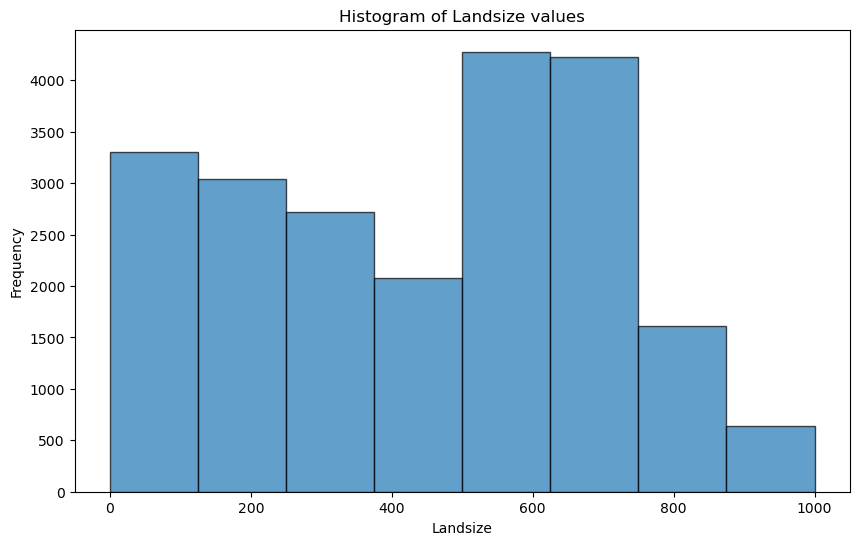

In [93]:
plt.figure(figsize=(10,6))
bin_edges = [0,125,250,375,500,625,750,875,1000]
plt.hist(data["Landsize"], bins = bin_edges, edgecolor = 'k', alpha =0.7)
plt.title("Histogram of Landsize values")
plt.xlabel("Landsize")
plt.ylabel("Frequency")

Eliminating the many high outliers of the Landsize data by including the middle quartiles of the housing landsize data: From 0 to 1000 landsize, centered around the mean of 670.

(0.0, 10000000.0)

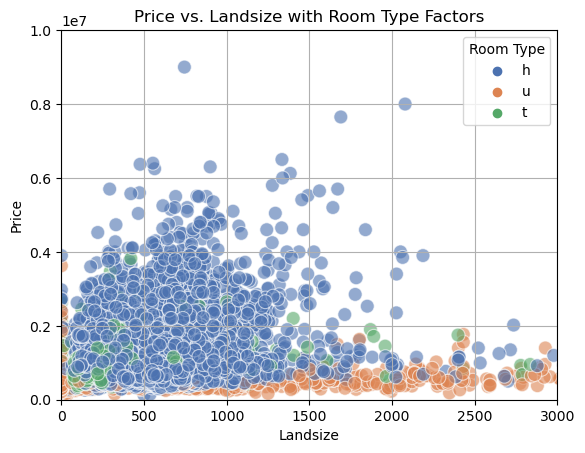

In [94]:
sns.scatterplot(x='Landsize', y='Price', hue='Type', data=data, palette='deep', s=100, alpha =0.6)



# Customize the plot
plt.title('Price vs. Landsize with Room Type Factors')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.grid(True)
plt.xlim(0,3000)
plt.ylim(0,1e7)

Visualization of Price in relation to landsize, with different colored dots to represent   
    1. "h": House   
    2. "u": Unit (apartment or flat)  
    3. "t": Townhouse  

Text(0.5, 1.0, 'Heatmap Example')

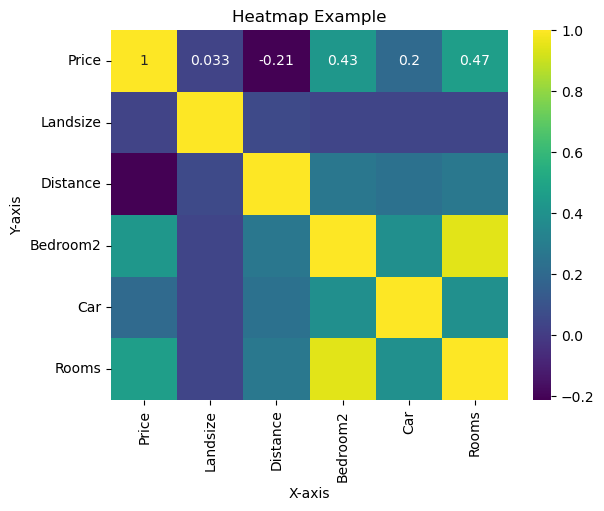

In [95]:
selected_columns = ["Price", "Landsize", "Distance", "Bedroom2", "Car", "Rooms"]  # List of column names you want to include in the heatmap

# Select the desired columns from the DataFrame
df_subset = data[selected_columns]

# Create heatmap using selected columns
sns.heatmap(df_subset.corr(), annot=True, cmap='viridis')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Example')


Taking a look at correlation between numerical variables, focusing on the row of Price; and ommitting the categorical variables for now.

In [120]:
data = data.dropna()

In [121]:
data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Regionname       0
Propertycount    0
Year             0
Month            0
dtype: int64

Removing all observations with null values.

In [119]:
Q1 = data['Landsize'].quantile(0.25)
Q3 = data['Landsize'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
data = data[data.Landsize<= upper_bound]

Removing the upper outliers of the Landsize column of the data frame.

# Feature Engineering

## Feature Extraction

In [97]:
data =data.drop(["BuildingArea", "YearBuilt"], axis =1)
data = data.drop(["Lattitude", "Longtitude"], axis = 1)

Removed Building Area and Year built from the data frame due to more than half of the observations contain missing values. Removed Lattitude and Longtitude due to redundancy in other columns which also specify location.

In [99]:
data.loc[data.Regionname.isnull(),['Regionname']]='Unspecified'

Missing values for Region Name will be relabeled as Unspecified.

In [102]:
data = data.drop(["Address"], axis = 1)

Unable to extract anything from Address, and has too many unique values, so dropped this column

In [103]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data = data.drop(columns = "Date")

Extracted the month and year from the date so I can use them values as a numerical feature in my model.

Date column is no longer useful and so we drop it.

## Feature Encoding

In [104]:
encode_list=["Suburb", "Type", "Method", "SellerG", "Postcode", "CouncilArea", "Regionname"]
for col in encode_list:
    data[col] = data[col].astype(str)  
    data[col]=np.unique(data[col],return_inverse=True)[1]
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,Year,Month
1,0,2,0,1480000.0,1,27,2.5,53,2.0,1.0,1.0,202.0,31,2,4019.0,2016,12
2,0,2,0,1035000.0,1,27,2.5,53,2.0,1.0,0.0,156.0,31,2,4019.0,2016,2
4,0,3,0,1465000.0,3,27,2.5,53,3.0,2.0,0.0,134.0,31,2,4019.0,2017,3
5,0,3,0,850000.0,0,27,2.5,53,3.0,2.0,1.0,94.0,31,2,4019.0,2017,3
6,0,4,0,1600000.0,4,191,2.5,53,3.0,1.0,2.0,120.0,31,2,4019.0,2016,6


Encoding all categorical columns into strings in order to avoid mismatched data types when using np.unique(). Then, converted all unique categorical variables into numerical factors so the machine learning model can use the data.

# Model Selection and Training

In [105]:
X=data.drop(columns=["Price"])
Y=data.Price
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

Splitting our data into train and test sets.

Picking the machine learning model XGBRegressor

In [106]:
max_depth=[8,9,10,11,12] 
learning_rate=[0.04,0.045,0.05,0.055] 
best_mse = float('inf')
best_md = None
best_lr = None

for md in max_depth:
    for lr in learning_rate:
        xgb = XGBRegressor(max_depth=md, learning_rate=lr, n_estimators=500,
                    reg_lambda=0.5,tree_method="hist" , device="cuda")
        xgb.fit(X_train ,Y_train)
        Y_pred=xgb.predict(X_test)
        mse=mean_squared_error(Y_pred ,Y_test)
        if mse < best_mse:
            best_mse = mse
            best_md = md
            best_lr = lr
print('Best max_depth: {}, Best learning_rate: {}, Lowest RMSE: {}'.format(best_md, best_lr, np.sqrt(best_mse)))


Best max_depth: 8, Best learning_rate: 0.04, Lowest RMSE: 289066.27250419767


Hyperparameter tuning to find the best parameters that minimize or root mean squared error. These parameters are shown above and their related RMSE.

In [107]:
bst = XGBRegressor(max_depth = 8, learning_rate = 0.04, n_estimators=500, reg_lambda=0.5, tree_method="hist")
bst.fit(X_train, Y_train)
test_preds = bst.predict(X_test)
test_predictions_df = pd.DataFrame({'Predicted': test_preds, 'Actual': Y_test})
test_predictions_df.to_csv('test_predictions.csv', index=False)


Fitting the XGBRegressor model to the training data with our optimal parameteres. 
Next, we predict the Housing Prices of our testing data and then send this to a csv file which compares it to the actual Housing Prices.

## Model Evaluation

In [108]:
test_mse = mean_squared_error(Y_test, test_preds)
print(f"Test MSE: {test_mse}")

Test MSE: 83559309899.47105


Mean Squared Error on the test data set is 8.89 x 10^10. This will be interpreted further in the next section along with our average MSE from K-fold cross validation.

In [123]:
k_folds = 5

# Initialize a list to store MSE for each fold
mse_scores = []

# Initialize a k-fold cross-validation splitter
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    Y_train_fold, Y_val_fold = Y.iloc[train_index], Y.iloc[val_index]
    
    # Initialize and train the XGBRegressor
    bst = XGBRegressor(max_depth = 8, learning_rate = 0.04, n_estimators=500, reg_lambda=0.5, tree_method="hist")
    bst.fit(X_train_fold, Y_train_fold)
    
    # Make predictions on the validation set
    val_preds = bst.predict(X_val_fold)
    
    # Calculate MSE for this fold
    fold_mse = mean_squared_error(Y_val_fold, val_preds)
    
    # Append the MSE to the list of scores
    mse_scores.append(fold_mse)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f'Average MSE across {k_folds} folds: {avg_mse}')

Average MSE across 5 folds: 92973371894.18729


K-fold Cross Validation gave an MSE of 9.3 x 10^10. This technique evaluates the model by training it on selected parts of the full data set and testing it on the ommitted parts. This gives us a better idea of the mean error when encountering uknown training data, resutling in a slightly bigger error than our first MSE, but not by any magnitudes of 10.

The reason our MSE looks so large is because our response variable Housing Prices has a mean of 1.08 x 10^6. Thus, if a house is 1,000,000 dollars and our prediction is 1,100,000; while we are only off by 1x10^5, our squared error would be 1x10^10.

## Feature Importance

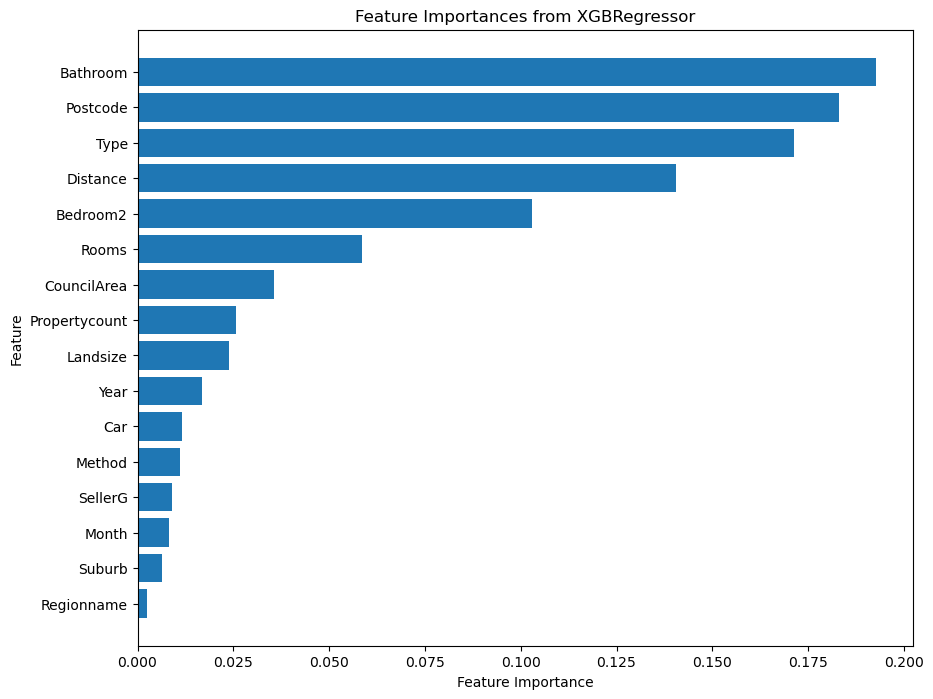

In [110]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBRegressor')
plt.show()

Using a function with the XGBRegressor model to create a bar graph illustrating feature importance. We find that the top three most important features are bathroom, postcode, and type. 